Esse cardeno possui os códigos utilizados nos experimentos de _Predição do Ano de Músicas a Partir de Timbres_. Tentamos deixar as células na mesma ordem em que se encontram os resultados e gráficos no artigo.
- André Almeida 164047
- Igor Torrente 164047

### Células de inicialização do código e dos dados

In [1]:
### IMPORTS ###
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
### PRINT RESULTS ###
def printResults(pred_y, valid_y):
    
    orange = mpatches.Patch(color='orange', label='Dado predito')
    blue = mpatches.Patch(color='blue', label='Dado real')
    
    mpl_fig = plt.figure()
    ax = mpl_fig.add_subplot(111)
    
    ax.set_title("Histograma de músicas/anos")
    ax.set_xlabel("Ano")
    ax.set_ylabel("Quantidade de músicas")
    
    
    # Get histogram of predited data and test
    hist_pred, bins_pred = np.histogram(pred_y, 109)
    hist_valid, bins_valid = np.histogram(valid_y, 109)

    # Prepare real data bars
    width = 0.7 * (bins_valid[1] - bins_valid[0])
    center = (bins_valid[:-1] + bins_valid[1:]) / 2
    plt.bar(center, hist_valid, align='center', width=2, alpha=1, color='blue')

    # Prepare result bars
    width = 0.7 * (bins_pred[1] - bins_pred[0])
    center = (bins_pred[:-1] + bins_pred[1:]) / 2
    plt.bar(center, hist_pred, align='center', width=2, alpha=0.45, color='orange')

    plt.legend(handles=[orange, blue])
    plt.show()

In [3]:
### GET DATA FROM FILE ###
data = pandas.read_csv("year-prediction-msd-train.txt")
test = pandas.read_csv("year-prediction-msd-test.txt")

In [4]:
### SPLIT TRAIN AND TEST DATA ###
train, validation = train_test_split(data, shuffle=True, train_size=0.8)

In [5]:
### SLIPT X AND F(X) ###

train_x = train.loc[:, 'ta01':]
train_y = train['year'].values

valid_x = validation.loc[:, 'ta01':]
valid_y = validation['year'].values

test_x = test.loc[:, 'ta01':]
test_y = test['year'].values

In [6]:
### RESCALE THE DATA ###
scaler = StandardScaler()

scaler.fit(train_x)
train_xs = scaler.transform(train_x)

scaler.fit(valid_x)
valid_xs = scaler.transform(valid_x)

scaler.fit(test_x)
test_xs = scaler.transform(test_x)

### Regressão linear com descida estocástica de gradiente

In [7]:
### APPLY SGDRegressor ###

sgdreg = linear_model.SGDRegressor(eta0=1e-4, max_iter=100)
sgdreg.fit(train_xs, train_y)
score = sgdreg.score(test_xs, test_y)

print(score)

0.22937448548


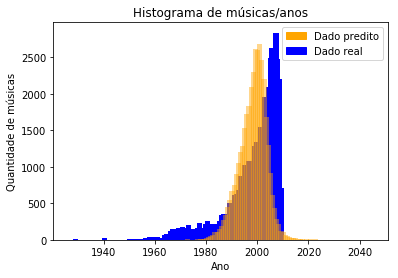

In [8]:
### PREDICT VALUES ###

pred_y = sgdreg.predict(test_xs)
printResults(pred_y, test_y)

In [9]:
### CALCULATE PRECISION ###

pred_y = sgdreg.predict(test_xs)
pred_y = np.around(pred_y)
pred_y = pred_y.astype(int)

erro = 0
for i in range(0, len(pred_y)):
    if pred_y[i] != test_y[i]:
        erro += 1
print("Precision: " + str(round(1 - erro/len(pred_y), 4) * 100) + "%")

Precision: 5.16%


In [10]:
### APPLY SGDRegressor TEST=1 ###

sgdreg = linear_model.SGDRegressor(eta0=1e-6, max_iter=50)
sgdreg.fit(train_xs, train_y)
score = sgdreg.score(valid_xs, valid_y)

print(score)

-15722.114453


In [11]:
### APPLY SGDRegressor TEST=2 ###

sgdreg = linear_model.SGDRegressor(eta0=1e-3, max_iter=200)
sgdreg.fit(train_xs, train_y)
score = sgdreg.score(valid_xs, valid_y)

print(score)

0.237791277329


In [12]:
### APPLY SGDRegressor TEST=3 ###

sgdreg = linear_model.SGDRegressor(eta0=1e-5, max_iter=150)
sgdreg.fit(train_xs, train_y)
score = sgdreg.score(valid_xs, valid_y)

print(score)

0.233869118218


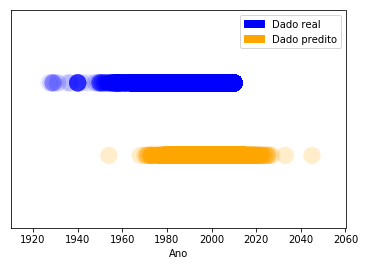

In [13]:
### PRINT 1D PLOT ####

orange = mpatches.Patch(color='orange', label='Dado predito')
blue = mpatches.Patch(color='blue', label='Dado real')
    
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_xlabel("Ano")

# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 8
# fig_size[1] = 1
#plt.rcParams["figure.figsize"] = fig_size

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)


plt.scatter(test_y, [2] * len(test_y), color='blue', alpha=0.05, s=300, edgecolors='none')
plt.scatter(pred_y, [1] * len(pred_y), color='orange', alpha=0.2, s=300, edgecolors='none')
plt.xlim(1910, 2060) 
plt.ylim(0, 3)
plt.legend(handles=[blue, orange])

plt.show()

### Regressão linear com Lasso

In [14]:
### LASSO MODEL ###

clf = linear_model.Lasso(alpha=0.0001)
clf.fit(train_xs, train_y)
score = clf.score(test_xs, test_y)

print(score)

0.229329259552


In [15]:
pred_y = clf.predict(test_xs)
pred_y = np.around(pred_y)
pred_y = pred_y.astype(int)

### CALCULATE PRECISION ###
erro = 0
for i in range(0, len(pred_y)):
    if pred_y[i] != test_y[i]:
        erro += 1
print("Precision: " + str(round(1 - erro/len(pred_y), 4) * 100) + "%")

Precision: 5.16%


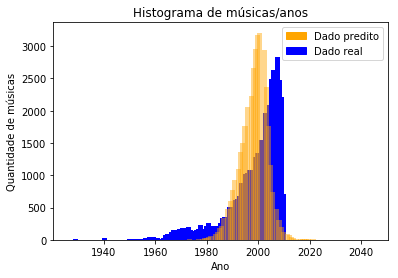

In [16]:
printResults(pred_y, test_y)

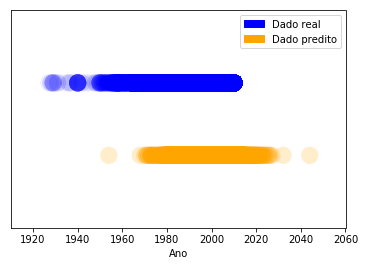

In [17]:
### PRINT 1D PLOT ####

orange = mpatches.Patch(color='orange', label='Dado predito')
blue = mpatches.Patch(color='blue', label='Dado real')
    
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_xlabel("Ano")

# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 8
# fig_size[1] = 1
# plt.rcParams["figure.figsize"] = fig_size

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)


plt.scatter(test_y, [2] * len(test_y), color='blue', alpha=0.05, s=300, edgecolors='none')
plt.scatter(pred_y, [1] * len(pred_y), color='orange', alpha=0.2, s=300, edgecolors='none')
plt.xlim(1910, 2060) 
plt.ylim(0, 3)
plt.legend(handles=[blue, orange])

plt.show()

### Regressão linear com Equação Normal

In [18]:
### LINEAR MODEL WITH NORMALIZE ###
regr = linear_model.LinearRegression(normalize=True)
regr.fit(train_x, train_y)
score = regr.score(test_x, test_y)

print(score)

0.229836372652


In [19]:
### LINEAR MODEL WITHOUT ###
regr = linear_model.LinearRegression(normalize=False)
regr.fit(train_x, train_y)
score = regr.score(test_x, test_y)

print(score)

0.229836372652


In [20]:
pred_y = regr.predict(test_x)
pred_y = np.around(pred_y)
pred_y = pred_y.astype(int)

### CALCULATE PRECISION AND ERROS METRICS ###
erro = 0
cima = 0
cima_erro = 0
baixo = 0
baixo_erro = 0

decadas = []

for i in range(0, 10):
    decadas.append(0)

for i in range(0, len(pred_y)):
    if pred_y[i] > test_y[i]:
        cima += 1
        cima_erro += pred_y[i] - test_y[i]
    
    if pred_y[i] < test_y[i]:
        baixo += 1
        baixo_erro += test_y[i] - pred_y[i]
    
    if pred_y[i] != test_y[i]:
        erro += 1
        decada = 192 - int(test_y[i]/10)
        decadas[decada] += 1
        
print("Precision: " + str(round(1 - erro/len(pred_y), 4) * 100) + "%")

print("erro", erro)
print("cima", cima)
print(cima_erro/cima)
print("baixo", baixo)
print(baixo_erro/baixo)

for i in range (0, len(decadas)):
    print((1920 + i * 10), decadas[i])

Precision: 5.2%
erro 34399
cima 13896
8.8965169833
baixo 20503
6.05672340633
1920 12
1930 703
1940 19959
1950 8060
1960 2877
1970 1694
1980 838
1990 207
2000 39
2010 10


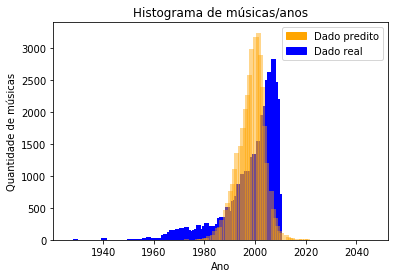

In [21]:
printResults(pred_y, test_y)

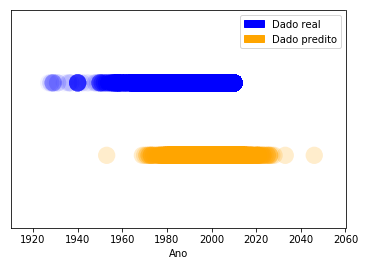

In [22]:
### PRINT 1D PLOT ####

orange = mpatches.Patch(color='orange', label='Dado predito')
blue = mpatches.Patch(color='blue', label='Dado real')
    
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_xlabel("Ano")

# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 6
# fig_size[1] = 2
# plt.rcParams["figure.figsize"] = fig_size

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)


plt.scatter(test_y, [2] * len(test_y), color='blue', alpha=0.05, s=300, edgecolors='none')
plt.scatter(pred_y, [1] * len(pred_y), color='orange', alpha=0.2, s=300, edgecolors='none')
plt.xlim(1910, 2060) 
plt.ylim(0, 3)
plt.legend(handles=[blue, orange])

plt.show()

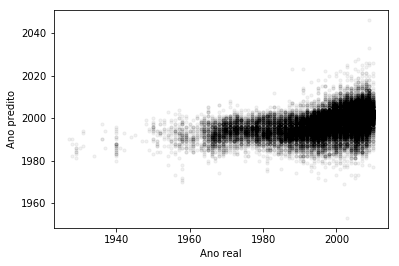

In [23]:
### PLOT PREDICTION VS REAL ###

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_xlabel("Ano real")
ax.set_ylabel("Ano predito")

plt.scatter(test_y, pred_y, color='black', alpha=0.05, s=10)
plt.show()

-612.110960644
-39.7293820601
-3.44662999451
-0.209528910322
0.164010867336
0.211256253185
0.223236766311
0.224873469475
0.227002315752


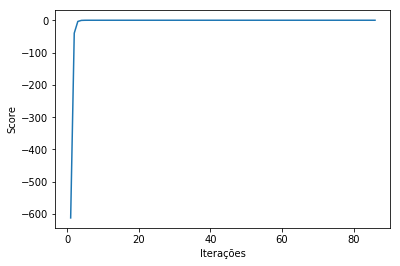

In [24]:
### PLOT ITERACTIONS VS SCORE ###
iters = []
scores = []
for i in range(1, 10, 1):
    sgdreg = linear_model.SGDRegressor(eta0=1e-4, max_iter=i)
    sgdreg.fit(train_xs, train_y)
    score = sgdreg.score(test_xs, test_y)
    iters.append(i)
    scores.append(score)
    print(score)

for i in range(11, 101, 15):
    sgdreg = linear_model.SGDRegressor(eta0=1e-4, max_iter=i)
    sgdreg.fit(train_xs, train_y)
    score = sgdreg.score(test_xs, test_y)
    iters.append(i)
    scores.append(score)

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.set_xlabel("Iterações")
ax.set_ylabel("Score")

plt.plot(iters, scores)
plt.show()